# Install Package 

In [1]:
'''PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.'''
try:
    import pycaret
except:
    !pip install --upgrade pycaret

'''
Missingno is an excellent and simple to use Python library that provides a series of visualisations
to understand the presence and distribution of missing data within a pandas dataframe.
This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram.
'''
try:
    import missingno
except:
    !pip install missingno


'''
InterpretML is an open-source package that incorporates state-of-the-art machine learning interpretability techniques under one roof.
With this package, you can train interpretable glassbox models and explain blackbox systems.
InterpretML helps you understand your model's global behavior, or understand the reasons behind individual predictions.
'''
try:
    import interpret
except:
    !pip install interpret



'''Tune-sklearn is a drop-in replacement for Scikit-Learn’s model selection module (GridSearchCV, RandomizedSearchCV) with cutting edge hyperparameter tuning techniques.'''

try:
    import tune_sklearn
except:    
    !pip install tune-sklearn ray[tune]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

<hr style="border: solid 3px blue;">

# Introduction

![](https://64.media.tumblr.com/d994c3b1c3adb94ac65692a599aae700/5866f6929b208337-cb/s540x810/bc492d78a4dc5a31fe7c5b42c1fff9bcd5938c9d.gif)

Picture Credit: https://techrecipe.co.kr

We always make big or small decisions. However, deciding something is not easy. Machines are also difficult to decide.
Even in this problem, we and the model always have to make difficult decisions. In particular, a more careful decision is required when a decision related to a person's life has to be made.

On what basis should the decision be made? In the end, we need to understand the dataset as much as possible and make the decision right through effective modeling. Let's start the difficult task.

We hope that the decision of us and the model will save many people.

## Features
* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

----------------------------
# Setting UP

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import PowerTransformer

sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('sample_submission.csv')
space_df = pd.concat([train_data, test_data], ignore_index = True, sort = False)
tr_idx = space_df['Transported'].notnull()

<hr style="border: solid 3px blue;">

# Anomaly Detection

![](https://www.oreilly.com/content/wp-content/uploads/sites/2/2019/06/8230004725_6338759eb3_o_crop-57552d1a7b9df6b9221d5c1fd342334f.jpg)

Picture Credit: https://www.oreilly.com/content

Before proceeding with EDA in earnest, anomaly detection is performed with a dataset. And, through this, we want to check which cases are judged as outliers and gain insight into EDA.

In [7]:
from pycaret.anomaly import *

In [6]:
# !pip install numba --upgrade
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires scipy<=1.5.4, but you have scipy 1.10.0 which is incompatible.


In [8]:
_ = pycaret.anomaly.setup(
    data=space_df[tr_idx],
    silent=True)

Description                 Value
0                               session_id                  8143
1                            Original Data            (8693, 14)
2                           Missing Values                  True
3                         Numeric Features                     7
4                     Categorical Features                     7
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data         (8693, 15052)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  anomaly-default-name
13                                     USI                  92cc
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [9]:
knn = pycaret.anomaly.create_model('knn')

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)
INFO:logs:create_model() succesfully completed......................................


------------------------------------------
## Extracting top 5 outliers 

In [10]:
knn_df = pycaret.anomaly.assign_model(knn)
abnormal_data = knn_df[knn_df.Anomaly == 1].sort_values(by='Anomaly_Score', ascending=False)
print("the size of anomaly = ",len(abnormal_data))
abnormal_data.head().style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Nearest Neighbors Detector
INFO:logs:Copying data
INFO:logs:(8693, 16)
INFO:logs:assign_model() succesfully completed......................................


the size of anomaly =  435


<span style="color:Blue"> Observation:
* There are a total of 435 outliers.
* In cases where HomePlanet is Europa and Destination is 55 Cancri e, there are many cases where anomaly was decided.

In [ ]:
plt.style.use("dark_background")
plot_model(knn,plot='umap')

In [12]:
plot_model(knn,plot='tsne')

INFO:logs:Rendering Visual


<hr style="border: solid 3px blue;">

# EDA

In [13]:
space_df.head().T.style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

-----------------------------------
## Checking Missing Values

![](https://miro.medium.com/max/640/0*10yDGnSUYVYTuHR-.jpg)

Picture Credit: https://miro.medium.com

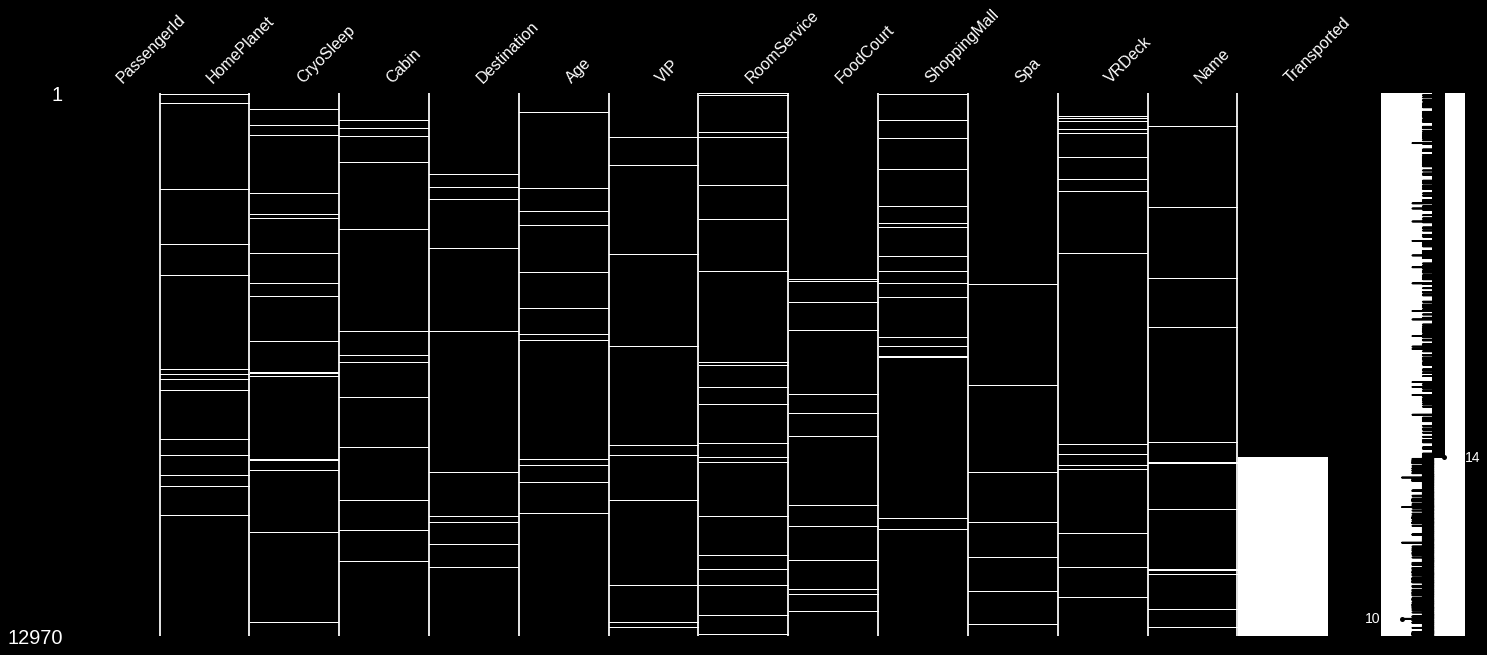

In [14]:
import missingno as msno
msno.matrix(space_df,color=(0, 0, 0))

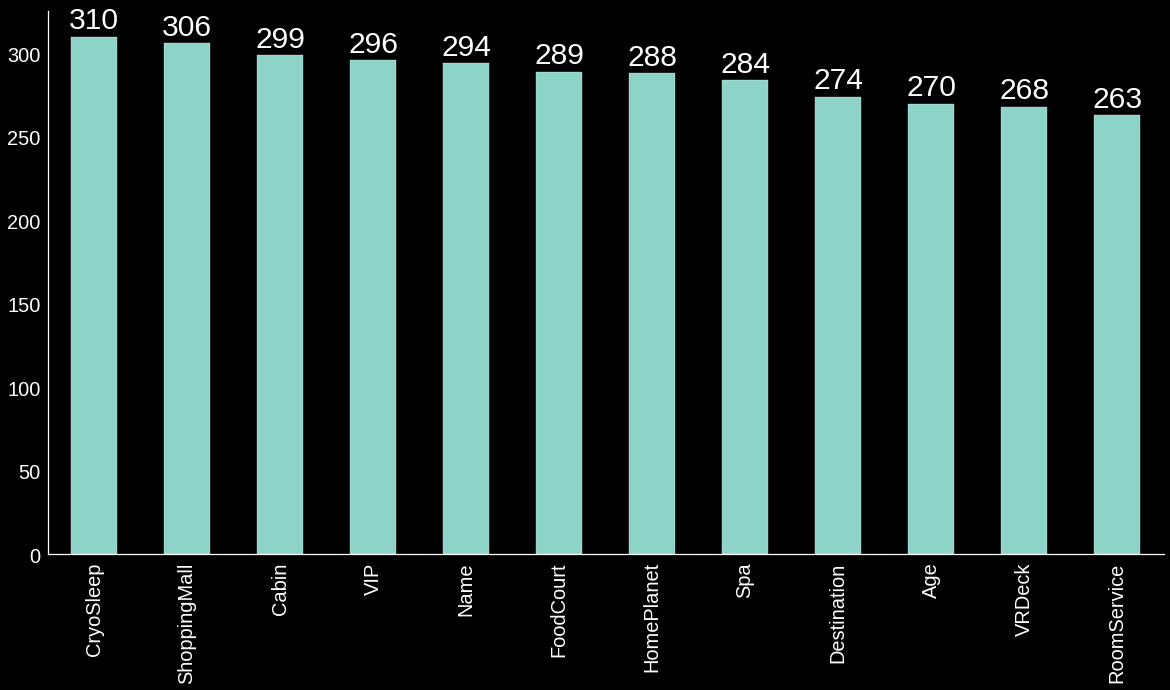

In [15]:
isnull_series = space_df.loc[:,:'Name'].isnull().sum()
isnull_series[isnull_series > 0].sort_values(ascending=False)

plt.figure(figsize = (20,10))

ax = isnull_series[isnull_series > 0].sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 5, height, ha = 'center', size = 30)
sns.despine()

<span style="color:Blue"> Observation:
* Unfortunately, there are many missing values. How the missing values ​​are filled is expected to have a big influence on the model performance.

------------------------------------------
## Checking Data Type

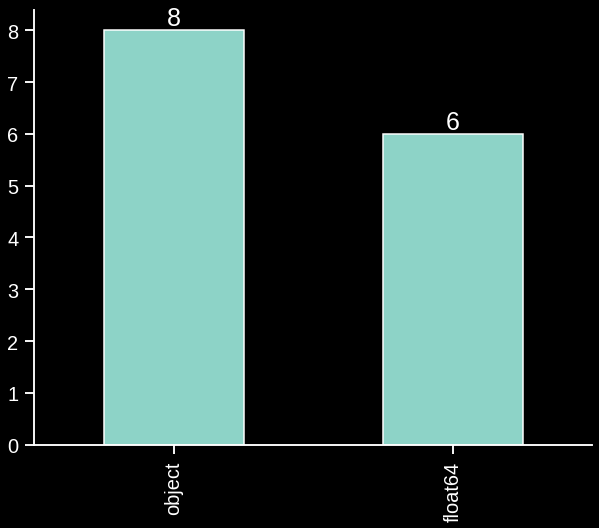

In [16]:
plt.figure(figsize = (10,8))
with plt.rc_context({'figure.facecolor':'black'}):
    sns.set(style="ticks", context="talk",font_scale = 1)
    plt.style.use("dark_background")
    ax = space_df.dtypes.value_counts().plot(kind='bar',fontsize=20)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+ p.get_width() / 2., height + 0.1, height, ha = 'center', size = 25)
    sns.despine()

---------------------------------------------
## Checking Target Balance

In [17]:
colors = ['gold', 'mediumturquoise']
labels = ['Not-Transported','Transported']
values = space_df['Transported'].value_counts()/space_df['Transported'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Target Blance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

<span style="color:Blue"> Observation:

* Target is well balanced.

<hr style="border: solid 2px black;">

# Categorical Features

![](http://cdn.shopify.com/s/files/1/1334/2321/articles/Picture1_1024x1024.png?v=1497575369)

Picture Credit: http://cdn.shopify.com

> In statistics, a categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.[1] In computer science and some branches of mathematics, categorical variables are referred to as enumerations or enumerated types. Commonly (though not in this article), each of the possible values of a categorical variable is referred to as a level. The probability distribution associated with a random categorical variable is called a categorical distribution.

Ref: https://en.wikipedia.org/wiki/Categorical_variable

-----------------------------------------------------
## Name

Let's decide the name as a unique value and drop it.

In [18]:
space_df.drop(['Name'],axis=1,inplace=True,errors='ignore')

------------------------------
## PassengerId 

A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. **People in a group are often family members, but not always.**

Let's make a group feature.

In [19]:
def extract_group(s):
    return s.split('_')[1]

space_df['Group'] = space_df['PassengerId'].apply(extract_group).astype(int)

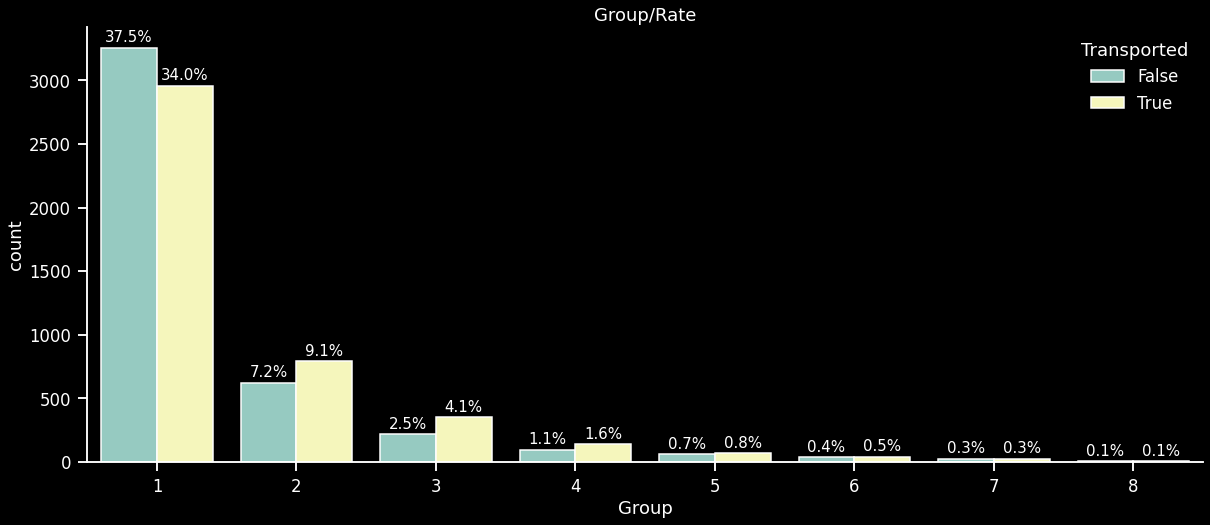

In [20]:
total_cnt = space_df[tr_idx]['Transported'].count()
plt.figure(figsize=(20,8))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="Group",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('Group/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 80, f'{height / total_cnt * 100:2.1f}%', va='center', ha='center', size=15)
sns.despine()

<span style="color:Blue"> Observation:
* People in Group 1 were relatively untransported.

In [21]:
space_df.drop(['PassengerId'],axis=1,inplace=True,errors='ignore')

------------------------------
## HomePlanet

The planet the passenger departed from, typically their planet of permanent residence.

In [22]:
space_df['Has_HomePlanet'] = space_df['HomePlanet'].isnull().astype(int)

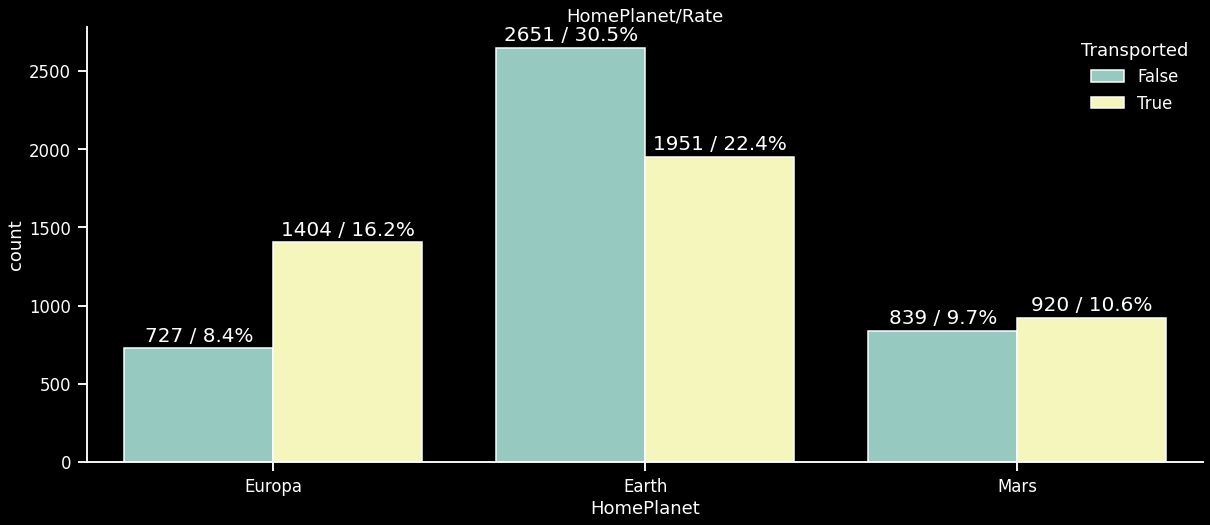

In [23]:
total_cnt = space_df[tr_idx]['Transported'].count()
plt.figure(figsize=(20,8))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="HomePlanet",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('HomePlanet/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 80, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

<span style="color:Blue"> Observation:

* Relatively many people from Earth are not transported.

---------------------
## CryoSleep

![](https://qph.fs.quoracdn.net/main-qimg-30ac22fbc0cff552d0db1094338da8f2-pjlq)

Picture Credit: https://qph.fs.quoracdn.net

Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [24]:
space_df['Has_CryoSleep'] = space_df['CryoSleep'].isnull().astype(int)

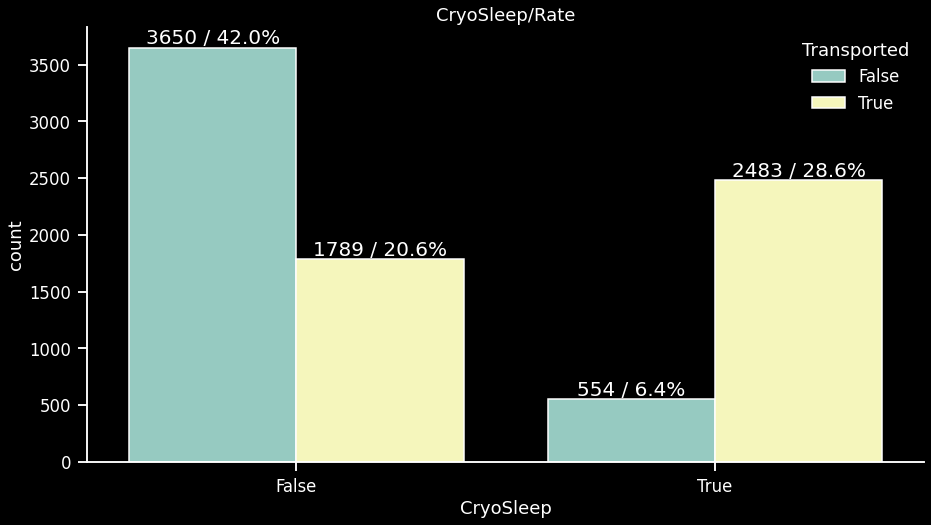

In [25]:
plt.figure(figsize=(15,8))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="CryoSleep",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('CryoSleep/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 80, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

<span style="color:Blue"> Observation:
* People doing CryoSleep were more transported.

---------------------
## Destination

The planet the passenger will be debarking to.

In [26]:
space_df['Has_Destination'] = space_df['Destination'].isnull().astype(int)

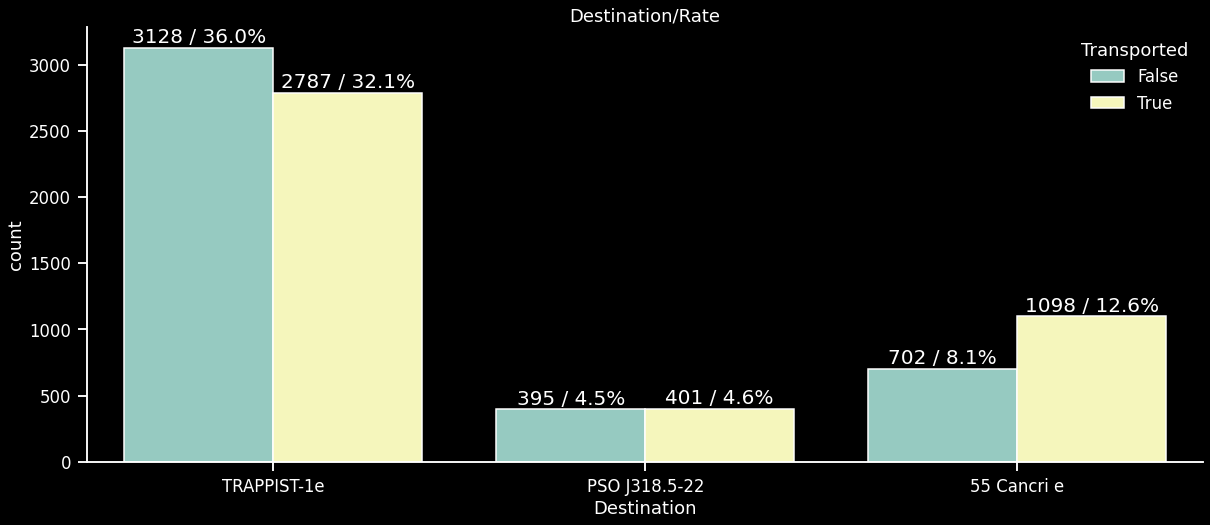

In [27]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="Destination",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('Destination/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 80, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

------------------------------
## Cabin

The cabin number where the passenger is staying. Takes the form **deck/num/side**, where side can be either P for Port or S for Starboard.

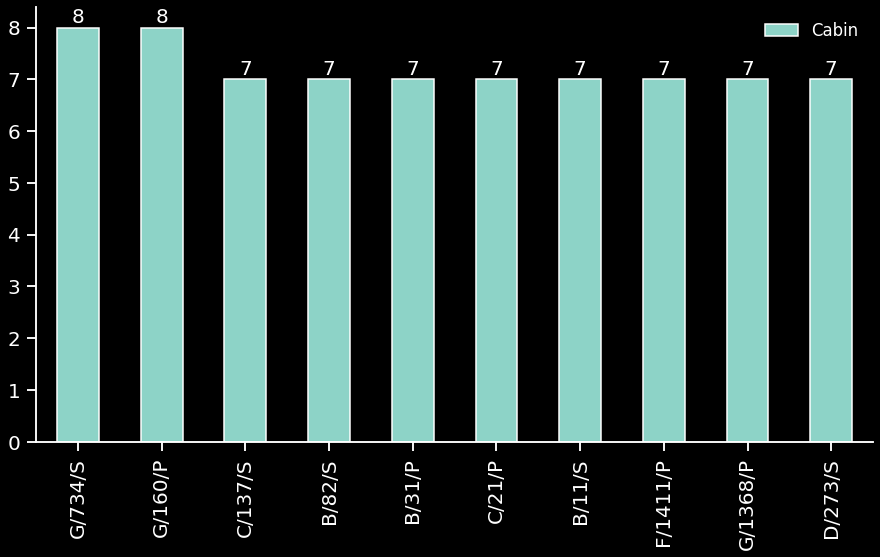

In [28]:
plt.figure(figsize=(15,8))
ax = space_df['Cabin'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20)
plt.legend(loc = 'upper right')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.1, height, ha = 'center', size = 20)
sns.despine()

In [29]:
space_df['Has_Cabin'] = space_df['Cabin'].isnull().astype(int)

In [30]:
space_df['Cabin'].fillna('None/None/None', inplace=True)

In [31]:
def extract_first(s):
    return s.split('/')[0]
def extract_mid(s):
    return s.split('/')[1]
def extract_last(s):
    return s.split('/')[2]

space_df['Deck'] = space_df['Cabin'].apply(extract_first)
space_df['Num'] = space_df['Cabin'].apply(extract_mid)
space_df['Side'] = space_df['Cabin'].apply(extract_last)

## Deck

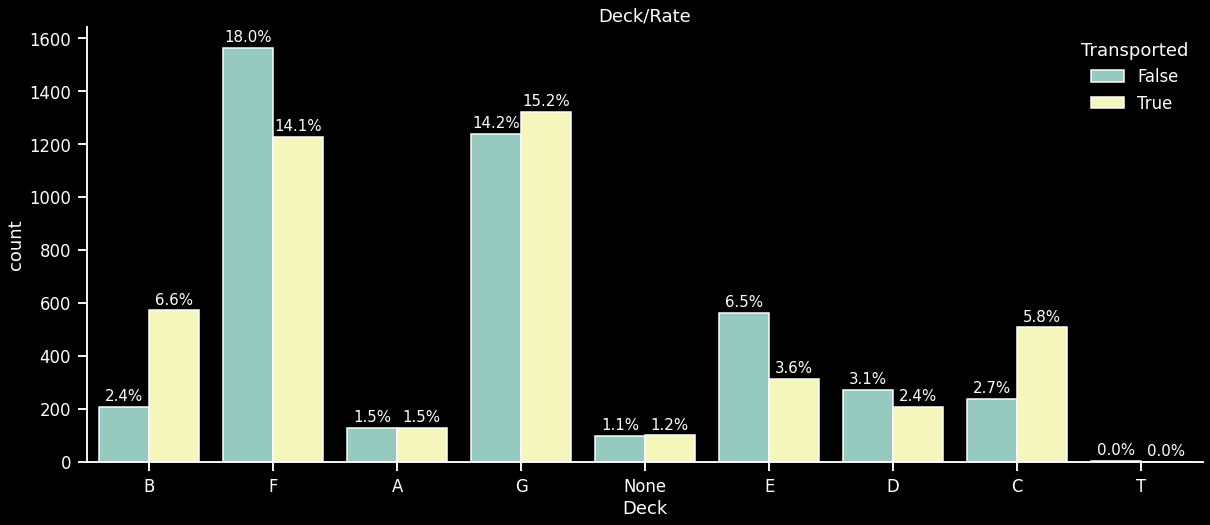

In [32]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="Deck",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('Deck/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 40, f'{height / total_cnt * 100:2.1f}%', va='center', ha='center', size=15)
sns.despine()

<span style="color:Blue"> Observation:
* There are many cases where people on the B, G, and C Decks are transported.
* There are many cases where people in F,E,D Decks are not transported.

## Side

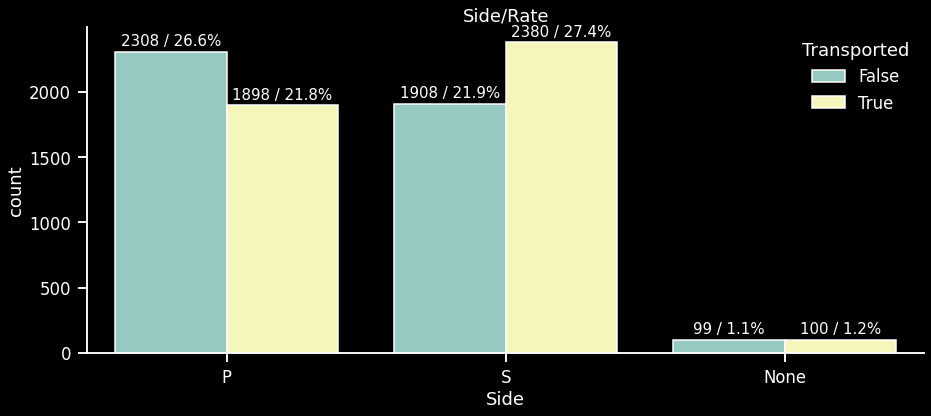

In [33]:
plt.figure(figsize=(15,6))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="Side",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('Side/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 80, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=15)
sns.despine()

<span style="color:Blue"> Observation:
* There are many cases where people on the S side are transported.

In [34]:
cat_cols = ['Deck','Num','Side']
space_df[cat_cols].nunique()

Deck       9
Num     1895
Side       3
dtype: int64

<span style="color:Blue"> Observation:
* The number of Num/Deck levels is large. It seems better to do label encoding than one-hot encoding.

In [35]:
for c in cat_cols:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    space_df[c]= le.fit_transform(space_df[c])

In [36]:
space_df.drop('Cabin',axis=1,inplace=True)

-----------------------------------------
## VIP

Whether the passenger has paid for special VIP service during the voyage.

In [37]:
space_df['Has_VIP'] = space_df['VIP'].isnull().astype(int)

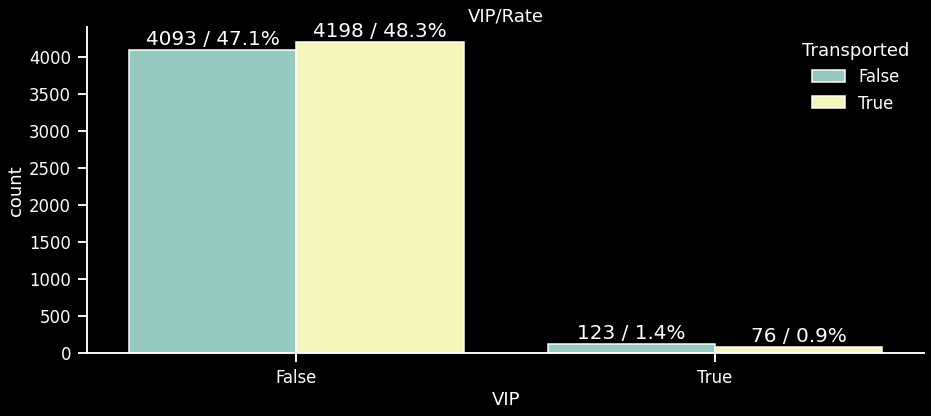

In [38]:
plt.figure(figsize=(15,6))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
ax = sns.countplot(x="VIP",
                   hue="Transported", 
                   data=space_df[tr_idx])
ax.set_title('VIP/Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 150, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

<span style="color:Blue"> Observation:
* It doesn't seem like transporte has become much special just because you receive VIP service.

<hr style="border: solid 2px black;">

# Numerical Features

![](http://cdn.shopify.com/s/files/1/1334/2321/articles/Picture1_1024x1024.png?v=1497575369)

Picture Credit: http://cdn.shopify.com

> Numeric variables have values that describe a measurable quantity as a number, like 'how many' or 'how much'. Therefore numeric variables are quantitative variables.

> Numeric variables may be further described as either continuous or discrete:
> * A continuous variable is a numeric variable. Observations can take any value between a certain set of real numbers. The value given to an observation for a continuous variable can include values as small as the instrument of measurement allows. Examples of continuous variables include height, time, age, and temperature.
> * A discrete variable is a numeric variable. Observations can take a value based on a count from a set of distinct whole values. A discrete variable cannot take the value of a fraction between one value and the next closest value. Examples of discrete variables include the number of registered cars, number of business locations, and number of children in a family, all of of which measured as whole units (i.e. 1, 2, 3 cars).

Ref: https://www.abs.gov.au/

In [39]:
def display_stat(df,feature):
    mean = df[feature].mean()
    std = df[feature].std()
    skew = df[feature].skew()
    kurtosis = df[feature].kurtosis()
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

In [40]:
def plot_histgram(df,feature):    
    fig = px.histogram(df, x=feature,
                       color="Transported", 
                       marginal="box",
                       barmode ="overlay",
                       histnorm ='density'
                      )  
    fig.update_layout(
        title={
            'text': feature+" histogram",
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},    
        paper_bgcolor="black",
        plot_bgcolor='black',
        font_color="white"
    )
    fig.show()

-----------------------------------------
## Age

First, let's check the correlation between Age and other features.

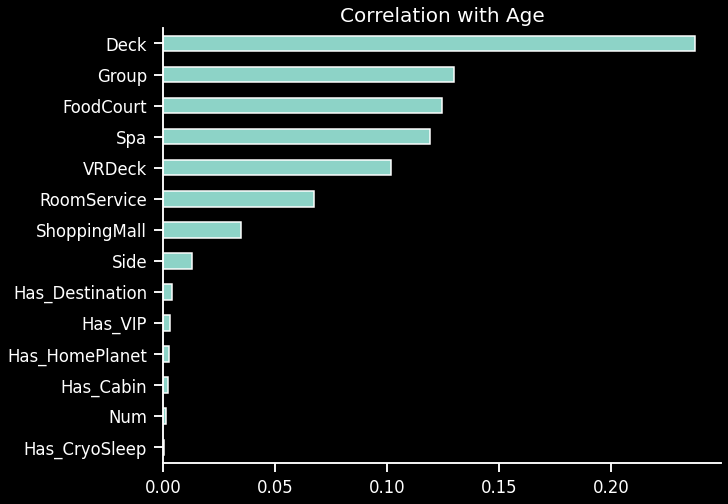

In [41]:
corr=space_df.corr()
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.figure(figsize=(10, 8))
abs(corr['Age']).sort_values()[:-1].plot.barh()
plt.title('Correlation with Age',fontsize=20)
sns.despine()

<span style="color:Blue"> Observation:
* The correlation between Age and Deck is higher than other features. 

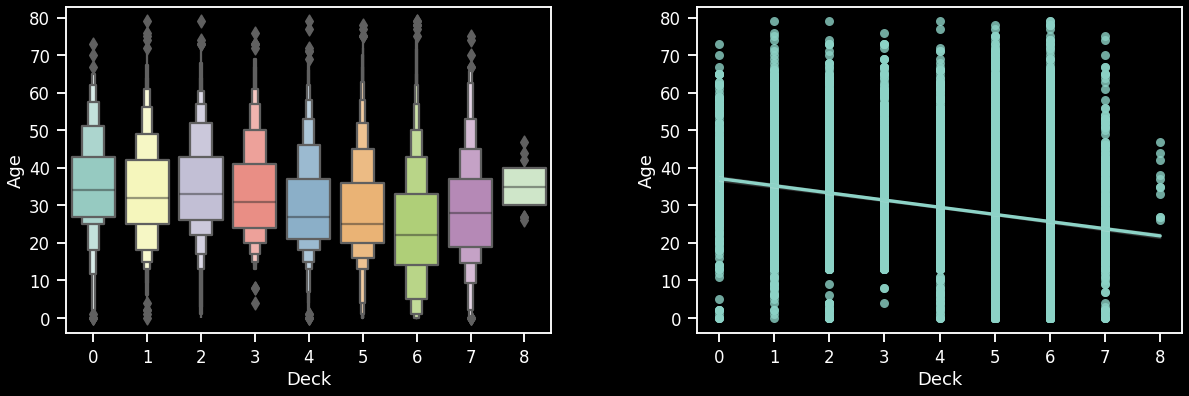

In [42]:
plt.figure(figsize=(20,6))
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
sns.boxenplot(data=space_df, x='Deck',y='Age')
plt.subplot(1,2,2)
sns.regplot(data=space_df, x='Deck',y='Age')

<span style="color:Blue"> Observation:
* The people on deck 6 appear to be younger than the people on the other decks.

In [43]:
plot_histgram(space_df[tr_idx],'Age')
display_stat(space_df[tr_idx],'Age')

mean: 28.8279, std: 14.4890, skew: 0.4191, kurtosis: 0.1019 


In [44]:
space_df['Has_Age'] = space_df['Age'].isnull().astype(int)

Fill in the missing values ​​with the median value for age for each deck.

In [45]:
space_df['Age'] = space_df['Age'].fillna(space_df.groupby('Deck')['Age'].transform('median'))

In [46]:
plot_histgram(space_df[tr_idx],'Age')
display_stat(space_df[tr_idx],'Age')

mean: 28.7790, std: 14.3557, skew: 0.4315, kurtosis: 0.1587 


-----------------------------------------------------------------
## Money paid for Titanic's many luxury amenities

![](https://blog-cdn.touringplans.com/blog/wp-content/uploads/2018/02/Star-Wars-Hotel-3498234-624x321.png)

Picture Credit: https://blog-cdn.touringplans.com

-----------------------------------------
### RoomService

In [47]:
space_df['Has_RoomService'] = space_df['RoomService'].isnull().astype(int)

In [48]:
display_stat(space_df[tr_idx],'RoomService')

mean: 224.6876, std: 666.7177, skew: 6.3330, kurtosis: 65.2738 


In [49]:
plot_histgram(space_df[tr_idx],'RoomService')
display_stat(space_df[tr_idx],'RoomService')

mean: 224.6876, std: 666.7177, skew: 6.3330, kurtosis: 65.2738 


<span style="color:Blue"> Observation:
* This feature is skewed. It seems necessary to do a non-linear transformation.

In [50]:
pt = PowerTransformer(method='yeo-johnson')
space_df[['RoomService_pt']] = pt.fit_transform(space_df[['RoomService']])

In [51]:
plot_histgram(space_df[tr_idx],'RoomService_pt')
display_stat(space_df[tr_idx],'RoomService_pt')
space_df.drop('RoomService_pt',axis=1,inplace=True)

mean: -0.0029, std: 0.9992, skew: 0.8107, kurtosis: -1.2456 


------------------------------
### FoodCourt

In [52]:
space_df['Has_FoodCourt'] = space_df['FoodCourt'].isnull().astype(int)

In [53]:
plot_histgram(space_df[tr_idx],'FoodCourt')
display_stat(space_df[tr_idx],'FoodCourt')

mean: 458.0772, std: 1611.4892, skew: 7.1022, kurtosis: 73.3072 


<span style="color:Blue"> Observation:
* This feature is skewed. It seems necessary to do a non-linear transformation.

In [54]:
space_df[['FoodCourt_pt']] = pt.fit_transform(space_df[['FoodCourt']])

In [55]:
plot_histgram(space_df[tr_idx],'FoodCourt_pt')
display_stat(space_df[tr_idx],'FoodCourt_pt')
space_df.drop('FoodCourt_pt',axis=1,inplace=True)

mean: 0.0014, std: 0.9998, skew: 0.7645, kurtosis: -1.3071 


--------------------------------
### ShoppingMall

In [56]:
space_df['Has_ShoppingMall'] = space_df['ShoppingMall'].isnull().astype(int)

In [57]:
plot_histgram(space_df[tr_idx],'ShoppingMall')
display_stat(space_df[tr_idx],'ShoppingMall')

mean: 173.7292, std: 604.6965, skew: 12.6276, kurtosis: 328.8709 


<span style="color:Blue"> Observation:
* This feature is skewed. It seems necessary to do a non-linear transformation.

In [58]:
space_df[['ShoppingMall_pt']] = pt.fit_transform(space_df[['ShoppingMall']])

In [59]:
plot_histgram(space_df[tr_idx],'ShoppingMall_pt')
display_stat(space_df[tr_idx],'ShoppingMall_pt')
space_df.drop('ShoppingMall_pt',axis=1,inplace=True)

mean: -0.0026, std: 0.9983, skew: 0.8386, kurtosis: -1.1882 


---------------------------------
### Spa

In [60]:
space_df['Has_Spa'] = space_df['Spa'].isnull().astype(int)

In [61]:
display_stat(space_df[tr_idx],'Spa')

mean: 311.1388, std: 1136.7055, skew: 7.6360, kurtosis: 81.2021 


In [62]:
plot_histgram(space_df[tr_idx],'Spa')
display_stat(space_df[tr_idx],'Spa')

mean: 311.1388, std: 1136.7055, skew: 7.6360, kurtosis: 81.2021 


<span style="color:Blue"> Observation:
* This feature is skewed. It seems necessary to do a non-linear transformation.

In [63]:
space_df[['Spa_pt']] = pt.fit_transform(space_df[['Spa']])

In [64]:
plot_histgram(space_df[tr_idx],'Spa_pt')
display_stat(space_df[tr_idx],'Spa_pt')
space_df.drop('Spa_pt',axis=1,inplace=True)

mean: 0.0006, std: 1.0012, skew: 0.7200, kurtosis: -1.3584 


------------------------------
### VRDeck

In [65]:
space_df['Has_VRDeck'] = space_df['VRDeck'].isnull().astype(int)

In [66]:
display_stat(space_df[tr_idx],'VRDeck')

mean: 304.8548, std: 1145.7172, skew: 7.8197, kurtosis: 86.0112 


In [67]:
plot_histgram(space_df[tr_idx],'VRDeck')
display_stat(space_df[tr_idx],'VRDeck')

mean: 304.8548, std: 1145.7172, skew: 7.8197, kurtosis: 86.0112 


<span style="color:Blue"> Observation:
* This feature is skewed. It seems necessary to do a non-linear transformation.

In [68]:
space_df[['VRDeck_pt']] = pt.fit_transform(space_df[['VRDeck']])

In [69]:
plot_histgram(space_df[tr_idx],'VRDeck_pt')
display_stat(space_df[tr_idx],'VRDeck_pt')
space_df.drop('VRDeck_pt',axis=1,inplace=True)

mean: 0.0085, std: 1.0036, skew: 0.7838, kurtosis: -1.2770 


In [70]:
space_df['TotalSpend'] = space_df['VRDeck'] + space_df['Spa'] + space_df['ShoppingMall'] + space_df['FoodCourt'] + space_df['RoomService']

<hr style="border: solid 2px black;">

# Non-Linear Transformation 

![](https://www.researchgate.net/profile/Chun-Fung-2/publication/224678404/figure/fig1/AS:646829247057921@1531227518360/llustration-of-Non-linear-Data-Transformation-3-Proposed-Framework-31-Previous-Work.png)

In [71]:
transform_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpend']
space_df[transform_features] = pt.fit_transform(space_df[transform_features])

<hr style="border: solid 3px blue;">

# Machine Learning

![](https://cdn.dribbble.com/users/1373613/screenshots/5436457/plexus___3.gif)

Picture Credit: https://cdn.dribbble.com

In [72]:
num_cols = space_df.select_dtypes(exclude = ['object', 'bool']).columns.tolist()

In [73]:
from pycaret.classification import *

---------------------------------------------------------
## Making Pipeline before Training

![](https://signal-to-noise.xyz/static/images/pipes.jpg)

Picture Credit: https://signal-to-noise.xyz

In [74]:
_ = setup(data = space_df[tr_idx], 
      target = 'Transported',
      numeric_features = num_cols,
      silent = True,
      remove_multicollinearity = True,
      ignore_low_variance = True,
      imputation_type = 'simple',
      categorical_imputation = 'mode',
      numeric_imputation = 'median' )

Description              Value
0                               session_id               1997
1                                   Target        Transported
2                              Target Type             Binary
3                            Label Encoded  False: 0, True: 1
4                            Original Data         (8693, 27)
5                           Missing Values               True
6                         Numeric Features                 22
7                     Categorical Features                  4
8                         Ordinal Features              False
9                High Cardinality Features              False
10                 High Cardinality Method               None
11                   Transformed Train Set         (6085, 18)
12                    Transformed Test Set         (2608, 18)
13                      Shuffle Train-Test               True
14                     Stratify Train-Test              False
15                          Fold Generator    StratifiedKFold
16                             Fold Number                 10
17                                CPU Jobs                 -1
18                                 Use GPU              False
19                          Log Experiment              False
20                         Experiment Name   clf-default-name
21                                     USI               222b
22                         Imputation Type             simple
23          Iterative Imputation Iteration               None
24                         Numeric Imputer             median
25      Iterative Imputation Numeric Model               None
26                     Categorical Imputer               mode
27  Iterative Imputation Categorical Model               None
28           Unknown Categoricals Handling     least_frequent
29                               Normalize              False
30                        Normalize Method               None
31                          Transformation              False
32                   Transformation Method               None
33                                     PCA              False
34                              PCA Method               None
35                          PCA Components               None
36                     Ignore Low Variance               True
37                     Combine Rare Levels              False
38                    Rare Level Threshold               None
39                         Numeric Binning              False
40                         Remove Outliers              False
41                      Outliers Threshold               None
42                Remove Multicollinearity               True
43             Multicollinearity Threshold                0.9
44             Remove Perfect Collinearity               True
45                              Clustering              False
46                    Clustering Iteration               None
47                     Polynomial Features              False
48                       Polynomial Degree               None
49                    Trignometry Features              False
50                    Polynomial Threshold               None
51                          Group Features              False
52                       Feature Selection              False
53                Feature Selection Method            classic
54            Features Selection Threshold               None
55                     Feature Interaction              False
56                           Feature Ratio              False
57                   Interaction Threshold               None
58                           Fix Imbalance              False
59                    Fix Imbalance Method              SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Age', 'RoomService',
                                                          'FoodCourt',
                                                          'ShoppingMall', 'Spa',
                                                          'VRDeck', 'Group',
                                                          'Has_HomePlanet',
                                                          'Has_CryoSleep',
                                                          'Has_Destination',
                                       

In [75]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")

-----------------------------------------
## Comparing Models

In [77]:
! pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scipy-1.5.4-cp38-cp38-manylinux1_x86_64.whl (25.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 KB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 KB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 KB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [83]:
# top3 = compare_models(sort='Accuracy',n_select = 3
#                       ,exclude = ['knn', 'svm','ridge','nb','dummy','qda','xgboost'] )
top3 = compare_models(sort='Accuracy',n_select = 3
                      ,exclude = ['knn', 'svm','ridge','nb','dummy','qda'] )

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.7992  0.8958  0.7955  0.8001   
gbc          Gradient Boosting Classifier    0.7980  0.8896  0.8305  0.7789   
rf               Random Forest Classifier    0.7926  0.8782  0.7582  0.8127   
ada                  Ada Boost Classifier    0.7878  0.8750  0.8189  0.7699   
et                 Extra Trees Classifier    0.7752  0.8529  0.7073  0.8164   
lda          Linear Discriminant Analysis    0.7528  0.8220  0.7218  0.7681   
lr                    Logistic Regression    0.7515  0.8222  0.7337  0.7592   
dt               Decision Tree Classifier    0.7392  0.7397  0.7436  0.7354   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.7976  0.5983  0.5986     0.359  
gbc       0.8037  0.5962  0.5978     0.651  
rf        0.7842  0.5850  0.5867     0.621  
ada       0.7934  0.5758  0.5773     0.212  
et        0.7575  0.5500  0.5554     0.478  
lda       0.7438  0.5055  0.5069     0.028  
lr        0.7458  0.5029  0.5037     0.799  
dt        0.7393  0.4784  0.4787     0.036

INFO:logs:create_model_container: 8
INFO:logs:master_model_container: 8
INFO:logs:display_container: 2
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1997, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0

In [85]:
# catboost = create_model('catboost')
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8079  0.8974  0.7954  0.8142  0.8047  0.6157  0.6159
1       0.8194  0.9197  0.8185  0.8185  0.8185  0.6387  0.6387
2       0.8062  0.9032  0.7855  0.8179  0.8013  0.6124  0.6129
3       0.7947  0.8763  0.7888  0.7967  0.7927  0.5895  0.5895
4       0.8030  0.9000  0.7822  0.8144  0.7980  0.6058  0.6063
5       0.7763  0.8707  0.7748  0.7748  0.7748  0.5526  0.5526
6       0.7928  0.8908  0.7682  0.8056  0.7864  0.5854  0.5860
7       0.7977  0.9011  0.8113  0.7878  0.7993  0.5955  0.5957
8       0.8207  0.9231  0.8350  0.8109  0.8228  0.6415  0.6418
9       0.7730  0.8757  0.7954  0.7603  0.7774  0.5461  0.5467
Mean    0.7992  0.8958  0.7955  0.8001  0.7976  0.5983  0.5986
Std     0.0151  0.0169  0.0196  0.0190  0.0149  0.0302  0.0302

INFO:logs:create_model_container: 9
INFO:logs:master_model_container: 9
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1997, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


---------------------------------------
## Tuning Hyperparamters

![](https://miro.medium.com/max/1400/0*8c_vfbRh9YUSeIXJ)

Ref: https://miro.medium.com

> In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.
> 
> The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss. Cross-validation is often used to estimate this generalization performance.

Ref: https://en.wikipedia.org/wiki/Hyperparameter_optimization

In [87]:
! pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached optuna-3.1.0-py3-none-any.whl (365 kB)
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)


In [92]:
tune_model?

In [101]:
tuned_lightgbm, tuner = tune_model(lightgbm, 
                            optimize = 'Accuracy',
                            search_library="tune-sklearn",
                            # search_algorithm="optuna",
                            early_stopping = True,
                            n_iter = 40
                            )

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8095  0.8921  0.7987  0.8148  0.8067  0.6190  0.6191
1       0.8227  0.9138  0.8251  0.8197  0.8224  0.6453  0.6453
2       0.8046  0.9013  0.7921  0.8108  0.8013  0.6091  0.6093
3       0.7816  0.8653  0.7822  0.7796  0.7809  0.5632  0.5632
4       0.7931  0.8964  0.7789  0.8000  0.7893  0.5861  0.5863
5       0.7812  0.8695  0.7980  0.7700  0.7837  0.5626  0.5630
6       0.8010  0.8923  0.7748  0.8153  0.7946  0.6018  0.6026
7       0.8092  0.9023  0.8146  0.8039  0.8092  0.6184  0.6185
8       0.8125  0.9187  0.8251  0.8039  0.8143  0.6250  0.6252
9       0.7928  0.8773  0.8053  0.7846  0.7948  0.5856  0.5858
Mean    0.8008  0.8929  0.7995  0.8003  0.7997  0.6016  0.6018
Std     0.0128  0.0168  0.0172  0.0160  0.0128  0.0257  0.0256

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 9
INFO:logs:LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=26, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=290, n_jobs=-1, num_leaves=150, objective=None,
               random_state=1997, reg_alpha=0.001, reg_lambda=10, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


TypeError: ignored

In [ ]:
# tuned_catboost = tune_model(catboost,
#                             optimize = 'Accuracy',
#                             search_library="tune-sklearn",
#                             search_algorithm="optuna",
#                             early_stopping = True,
#                             n_iter = 40)

----------------------------------------------------------
# Interpreting Models


In [ ]:
# with plt.rc_context({'figure.facecolor':'lightgrey'}):
#     interpret_model(catboost)

<span style="color:Blue"> Observation:
* Spa, VRDeck, and RoomService features were judged to be important features.

In [ ]:
# interpret_model(catboost,plot='pdp',feature='Spa')

In [ ]:
# interpret_model(catboost,plot='pdp',feature='VRDeck')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1997, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


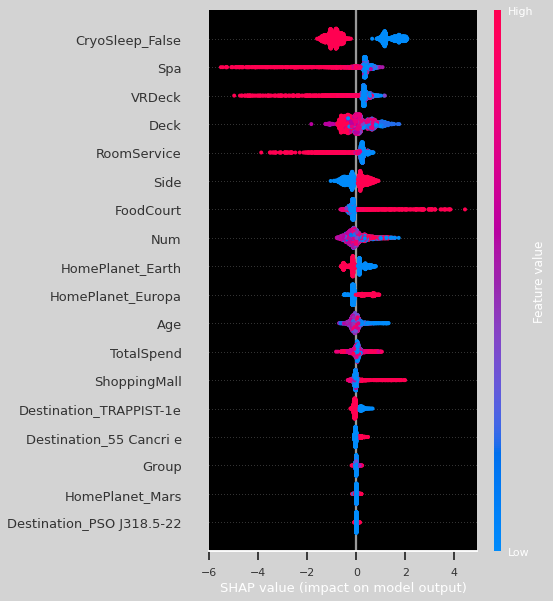

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [102]:
with plt.rc_context({'figure.facecolor':'lightgrey'}):
    interpret_model(lightgbm)

<span style="color:Blue"> Observation:
* The lightgbm model judged the CryoSleep feature as the most important features.
* This diversity is an advantage of ensemble learning. 

-----------------------------------------------------------
# Ensemble (Soft Voting)

![](https://miro.medium.com/max/806/1*bliKQZGPccS7ho9Zo6uC7A.jpeg)

Picture Credit: https://miro.medium.com

> Ensemble learning is the process by which multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem. Ensemble learning is primarily used to improve the (classification, prediction, function approximation, etc.) performance of a model, or reduce the likelihood of an unfortunate selection of a poor one. Other applications of ensemble learning include assigning a confidence to the decision made by the model, selecting optimal (or near optimal) features, data fusion, incremental learning, nonstationary learning and error-correcting. This article focuses on classification related applications of ensemble learning, however, all principle ideas described below can be easily generalized to function approximation or prediction type problems as well.

Ref: http://www.scholarpedia.org/article/Ensemble_learning

In [105]:
# blend_soft = blend_models(estimator_list = [catboost,lightgbm], optimize = 'Accuracy',method = 'soft')
blend_soft = blend_models(estimator_list = [lightgbm], optimize = 'Accuracy',method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8079  0.8974  0.7954  0.8142  0.8047  0.6157  0.6159
1       0.8194  0.9197  0.8185  0.8185  0.8185  0.6387  0.6387
2       0.8062  0.9032  0.7855  0.8179  0.8013  0.6124  0.6129
3       0.7947  0.8763  0.7888  0.7967  0.7927  0.5895  0.5895
4       0.8030  0.9000  0.7822  0.8144  0.7980  0.6058  0.6063
5       0.7763  0.8707  0.7748  0.7748  0.7748  0.5526  0.5526
6       0.7928  0.8908  0.7682  0.8056  0.7864  0.5854  0.5860
7       0.7977  0.9011  0.8113  0.7878  0.7993  0.5955  0.5957
8       0.8207  0.9231  0.8350  0.8109  0.8228  0.6415  0.6418
9       0.7730  0.8757  0.7954  0.7603  0.7774  0.5461  0.5467
Mean    0.7992  0.8958  0.7955  0.8001  0.7976  0.5983  0.5986
Std     0.0151  0.0169  0.0196  0.0190  0.0149  0.0302  0.0302

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 10
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=1997, reg_alpha=0.0,
                                             reg_lambda=0.0, silen

In [106]:
opt_model = optimize_threshold(blend_soft)

INFO:logs:Initializing optimize_threshold()
INFO:logs:optimize_threshold(estimator=VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=1997, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                       

INFO:logs:returning model with best metric
INFO:logs:optimize_threshold() succesfully completed......................................


In [107]:
cali_model = calibrate_model(opt_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8177  0.8994  0.8581  0.7927  0.8241  0.6356  0.6378
1       0.8144  0.9195  0.8779  0.7778  0.8248  0.6291  0.6343
2       0.8128  0.9017  0.8548  0.7872  0.8196  0.6258  0.6281
3       0.7980  0.8741  0.8647  0.7616  0.8099  0.5963  0.6018
4       0.8079  0.9023  0.8548  0.7801  0.8157  0.6159  0.6187
5       0.7780  0.8699  0.8576  0.7379  0.7933  0.5564  0.5637
6       0.8026  0.8966  0.8245  0.7880  0.8058  0.6054  0.6060
7       0.8043  0.8995  0.8874  0.7592  0.8183  0.6090  0.6177
8       0.8174  0.9256  0.8944  0.7743  0.8300  0.6351  0.6428
9       0.7763  0.8805  0.8581  0.7365  0.7927  0.5529  0.5605
Mean    0.8030  0.8969  0.8632  0.7695  0.8134  0.6061  0.6111
Std     0.0143  0.0171  0.0187  0.0191  0.0122  0.0285  0.0275

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 22
INFO:logs:CustomProbabilityThresholdClassifier(base_estimator=VotingClassifier(estimators=[('lightgbm',
                                                                                  LGBMClassifier(boosting_type='gbdt',
                                                                                                 class_weight=None,
                                                                                                 colsample_bytree=1.0,
                                                                                                 importance_type='split',
                                                                                                 learning_rate=0.1,
                                                                                                 max_depth=-1,
                                                                                       

In [108]:
final_model = finalize_model(cali_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=CustomProbabilityThresholdClassifier(base_estimator=VotingClassifier(estimators=[('lightgbm',
                                                                                  LGBMClassifier(boosting_type='gbdt',
                                                                                                 class_weight=None,
                                                                                                 colsample_bytree=1.0,
                                                                                                 importance_type='split',
                                                                                                 learning_rate=0.1,
                                                                                                 max_depth=-1,
                                                                                                 min_child_samples=20,
         

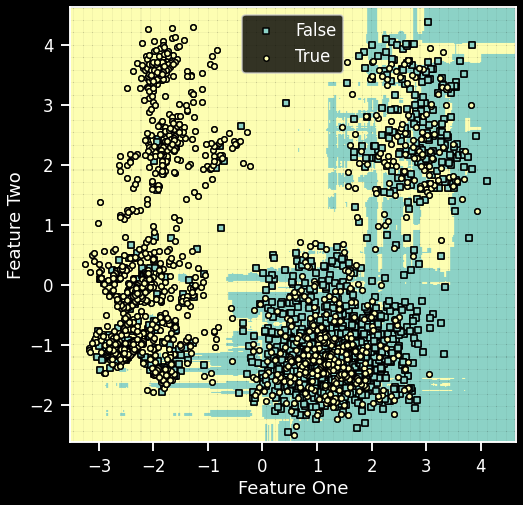

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [109]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

<span style="color:Blue"> Observation:
* Boundary decision is an important thing to do with models. Looking at the picture above, it can be seen that our model does its best to determine the boundary.
* Areas where the model cannot determine the boundary at all are observed.    

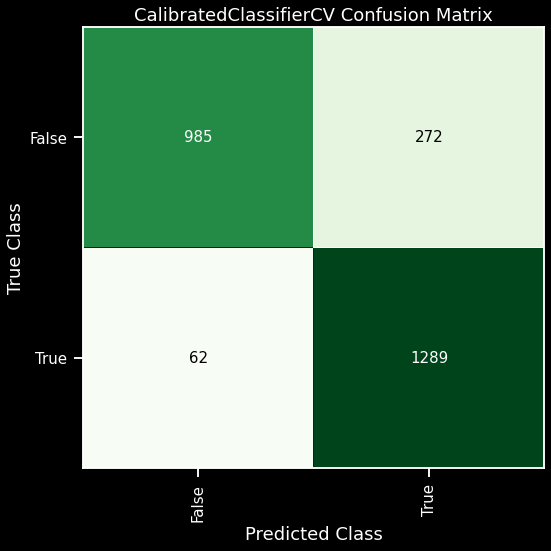

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [110]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='confusion_matrix')

In [111]:
X_test_df = space_df[~tr_idx].drop('Transported',axis=1)
last_result_df = predict_model(final_model, data=X_test_df)
submission_data['Transported'] = list(last_result_df.Label)
submission_data.to_csv('submission.csv', index = False)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=CustomProbabilityThresholdClassifier(base_estimator=VotingClassifier(estimators=[('lightgbm',
                                                                                  LGBMClassifier(boosting_type='gbdt',
                                                                                                 class_weight=None,
                                                                                                 colsample_bytree=1.0,
                                                                                                 importance_type='split',
                                                                                                 learning_rate=0.1,
                                                                                                 max_depth=-1,
                                                                                                 min_child_samples=20,
           

<hr style="border: solid 3px blue;">